# One-hot Encoding
One-Hot encoding, also known as one-bit effective encoding, uses an N-bit status register to encode N states, each state being independent of its register bits, and only one bit is active at any time.

Using one-hot encoding, the value of the discrete feature is extended to the European space, and a certain value of the discrete feature corresponds to a certain point in the European space.

## Dataset Pre-processing

In [1]:
import os
from collections  import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
dataset_root = '/Users/lila/Downloads/Data Science Toolbox/KDD'
current_path = %pwd

In [3]:
raw_data = os.path.join(dataset_root, 'kddcup.data_10_percent')

In [4]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']

In [5]:
col_names = np.array(header_names)

nominal_idx = [1,2,3]
binary_idx = [6, 11,13,14,20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [6]:
category = defaultdict(list)
category['benign'].append('normal.')

with open(r'/Users/lila/Downloads/Data Science Toolbox/KDD/training_attack_types1.0.txt', mode = 'r', encoding = 'utf-8-sig') as f:
    for line in f.readlines():
        #print(line.strip().split(' '))
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [7]:
data_df = pd.read_csv(raw_data, names=header_names)
data_df['attack_category'] = data_df['attack_type'].map(lambda x: attack_mapping[x])

In [8]:
#Mapping of Categorical data in the dataset
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Replacing the encoded data in the dataset
data_df.replace(cleanup_nums, inplace=True)

In [9]:
cleanup_category = {"attack_category":{"dos": 1, "benign": 0, "probe": 1, "r2l": 1, "u2r": 1}}
data_df.replace(cleanup_category, inplace=True)

In [10]:
y = data_df['attack_category']

In [11]:
data_df = data_df.drop('attack_category', axis=1)
data_df = data_df.drop('attack_type', axis=1)
data_df = data_df.drop('service', axis=1)
data_df = data_df.drop('flag', axis=1)

In [12]:
x = data_df

In [13]:
data_df.head()
data_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
src_bytes,181.00,239.00,235.00,219.00,217.00,217.00,212.00,159.00,210.00,212.00,...,308.00,291.00,289.00,306.00,289.00,310.00,282.00,203.00,291.00,219.00
dst_bytes,5450.00,486.00,1337.00,1337.00,2032.00,2032.00,1940.00,4087.00,151.00,786.00,...,662.00,1862.00,244.00,662.00,1862.00,1881.00,2286.00,1200.00,1200.00,1234.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_failed_logins,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
logged_in,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [14]:
#StandardScaler - Apply to all the numeric columns
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(data_df[numeric_cols])
data_df[numeric_cols] = standard_scaler.transform(data_df[numeric_cols])

In [15]:
#Cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 80% training data and 20% testing data randomly
features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.2, random_state=42)

------------------------------------------
Accuracy =  98.47173726026011  %
[[19065   288]
 [ 1222 78230]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19353
           1       1.00      0.98      0.99     79452

    accuracy                           0.98     98805
   macro avg       0.97      0.98      0.98     98805
weighted avg       0.99      0.98      0.98     98805



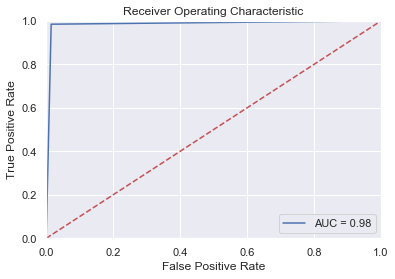

In [16]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## One-hot encoding
For testing, here we only have one-hot encoding for the "protocol_type" feature, because one-hot encoding for "service" and "flag" may extend the feature dimension by three times, after which Feature Selection may out of action and the accuracy will be reduced.

In [17]:
protocol_type_one_hot = pd.get_dummies(data_df["protocol_type"])

In [18]:
standard_scaler = StandardScaler().fit(protocol_type_one_hot)
protocol_type_one_hot = standard_scaler.transform(protocol_type_one_hot)

In [19]:
protocol_type_one_hot = pd.DataFrame(protocol_type_one_hot)

In [20]:
#StandardScaler - Apply to all the numeric columns
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(data_df[numeric_cols])
data_df[numeric_cols] = standard_scaler.transform(data_df[numeric_cols])

In [21]:
data_df = data_df.drop('protocol_type', axis=1)
data_df = data_df.join(protocol_type_one_hot)

In [22]:
x = data_df

In [23]:
#Cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 80% training data and 20% testing data randomly
features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.2, random_state=42)

------------------------------------------
Accuracy =  98.51019685238602  %
[[19104   249]
 [ 1223 78229]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19353
           1       1.00      0.98      0.99     79452

    accuracy                           0.99     98805
   macro avg       0.97      0.99      0.98     98805
weighted avg       0.99      0.99      0.99     98805



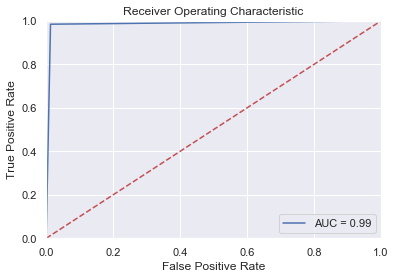

In [24]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After one-hot encoding, the accuracy rate has improved a little, but it is not obvious. We can see that after adding information, we have learned more.